In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


In [0]:
num_words_ = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words_)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
print(train_data[:3])
print(train_data.shape, '\n')
print(train_labels[:3])
print(train_labels.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [0]:
# One hot encoding the data
def vectorize_sequences(sequences, dim):
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data, num_words_)
x_test = vectorize_sequences(test_data, num_words_)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words_,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Validation Split - for metric tracking during training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train Model
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_val, y_val) )


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 232us/sample - loss: 0.5249 - accuracy: 0.7843 - val_loss: 0.4135 - val_accuracy: 0.8555
Epoch 2/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.3269 - accuracy: 0.9011 - val_loss: 0.3185 - val_accuracy: 0.8876
Epoch 3/20
15000/15000 [==============================] - 1s 73us/sample - loss: 0.2389 - accuracy: 0.9249 - val_loss: 0.2857 - val_accuracy: 0.8899
Epoch 4/20
15000/15000 [==============================] - 1s 71us/sample - loss: 0.1899 - accuracy: 0.9376 - val_loss: 0.2728 - val_accuracy: 0.8930
Epoch 5/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.1542 - accuracy: 0.9518 - val_loss: 0.3347 - val_accuracy: 0.8675
Epoch 6/20
15000/15000 [==============================] - 1s 73us/sample - loss: 0.1284 - accuracy: 0.9615 - val_loss: 0.2928 - val_accuracy: 0.8815
Epoch 7/20
15000/15000 [==============================]

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

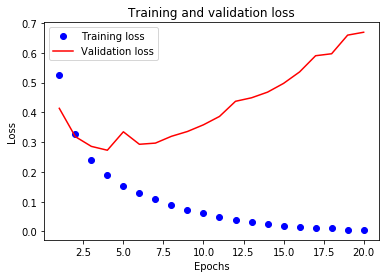

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

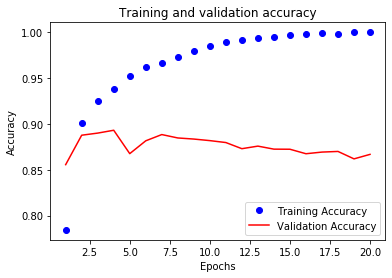

In [0]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model begins overfitting on the training data after 4 epochs, so we can limit the number of epochs the model trains for.

In [0]:
# Retraining the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words_,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Use all training data - Limit 4 epochs to prevent overfitting
model.fit(x_train, y_train, batch_size=512)
results = model.evaluate(x_test, y_test)

print('Test Loss =', results[0])
print('Test Accuracy =', results[1])

Train on 25000 samples
25000/25000 [==============================] - 2s 96us/sample - loss: 0.3302 - accuracy: 0.8793
Test Loss = 0.33022617679595945
Test Accuracy = 0.87928


In [0]:
# Model predictions (as probabilities of reviews being positive)
print('Predicted Probabilities: \n', model.predict(x_test))
print('\n Predicted Classes: \n', model.predict_classes(x_test))

Predicted Probabilities: 
 [[6.45059699e-05]
 [1.00000000e+00]
 [6.32195294e-01]
 ...
 [8.72140154e-05]
 [1.02178665e-05]
 [2.41646826e-01]]

 Predicted Classes: 
 [[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
